In [16]:
'''
pip install pydicom
pip install git+https://github.com/pydicom/pydicom-data/
import pydicom; pydicom.data.fetch_data_files()
pip install pillow
pip install git+https://github.com/Who8MyLunch/CharPyLS
pip install python-gdcm
'''
import pydicom
import matplotlib.pyplot as plt

In [11]:
from pydicom.data import get_testdata_file
filename = get_testdata_file("rtplan.dcm")

In [13]:
ds = pydicom.dcmread(filename)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 156
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Plan Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.999.999.99.9.9999.9999.20030903150023
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.888.888.88.8.8.8
-------------------------------------------------
(0008, 0012) Instance Creation Date              DA: '20030903'
(0008, 0013) Instance Creation Time              TM: '150031'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.777.777.77.7.7777.7777.20030903150023
(0008, 0020) Study Date                          DA: '20030716'
(0008, 0030) Study Time                          TM: '153557'
(0008, 0050) Accession Number                

In [14]:
filename = get_testdata_file("CT_small.dcm")
ds = pydicom.dcmread(filename)
pixel_bytes = ds.PixelData

In [15]:
arr = ds.pixel_array
arr

array([[175, 180, 166, ..., 203, 207, 216],
       [186, 183, 157, ..., 181, 190, 239],
       [184, 180, 171, ..., 152, 164, 235],
       ...,
       [906, 910, 923, ..., 922, 929, 927],
       [914, 954, 938, ..., 942, 925, 905],
       [959, 955, 916, ..., 911, 904, 909]], dtype=int16)

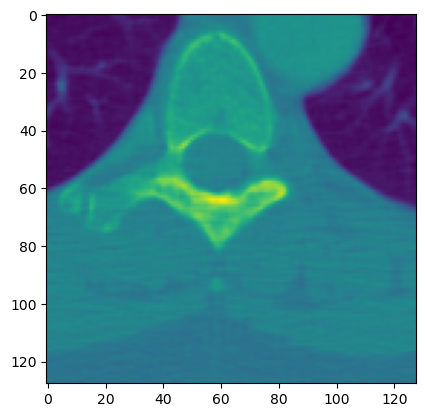

In [17]:
plt.imshow(arr)

## Pixel data

In [19]:
from pydicom import dcmread
filename = get_testdata_file("MR_small.dcm")
ds = dcmread(filename)
ds.PixelData 

b'\x89\x03\xfb\x03\xcb\x04\xeb\x04\xf9\x02\x94\x01\x7f\x02\x92\x038\x05a\x08g\x04%\x04=\x03\x1e\x02\x86\x01i\x01l\x01\x7f\x01\x8d\x01\x92\x01\x90\x01`\x01C\x011\x01,\x01;\x01Z\x016\x01\x8b\x01\xb7\x01\xcb\x01\xa6\x01?\x01i\x01\x83\x01\xb1\x01s\x010\x01+\x01\x10\x01\x13\x01x\x01J\x02\xfb\x02\x9f\x03\xa4\x04\xe2\x03\xc9\x02\x17\x02\x89\x01\xb5\x01\xa1\x01Q\x01\\\x01\r\x01\x17\x01!\x01)\x01\x18\x01\x11\x01\x03\x01.\x010\x01H\x01t\x02\x02\x03\x8b\x03\x8e\x04(\x04H\x02\x89\x01g\x02\x8c\x03\xff\x05\xcc\x07\xd7\x04\x81\x03}\x02\xc4\x01S\x01e\x01g\x01n\x01\x8e\x01\x88\x01s\x01C\x01+\x01=\x01D\x01e\x01L\x01@\x01[\x01x\x01\xb4\x01G\x01+\x01I\x01\x90\x01<\x01\x15\x01\x08\x01\x04\x01\x13\x01\x13\x01v\x01>\x02\xfe\x02s\x04\x80\x04\xed\x02\xfa\x01m\x01\x9f\x01\x92\x01o\x01 \x01\x08\x01\xf6\x00\xf5\x00\x03\x01\x19\x01\xfd\x00\xff\x00*\x01K\x01c\x01\xf2\x016\x02\xc2\x02S\x03~\x04%\x03\xc3\x01\xa0\x01p\x02\x94\x03\xef\x05T\x06\x15\x04\xc0\x02\x96\x02\x8d\x01K\x01O\x01b\x01z\x01\x9b\x01|\x01G\x01.\x01\x

## Palette color

In [22]:
from pydicom.pixel_data_handlers.util import apply_color_lut

fname = get_testdata_file("OBXXXX1A.dcm")
ds = dcmread(fname)
arr = ds.pixel_array
rgb = apply_color_lut(arr, ds)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


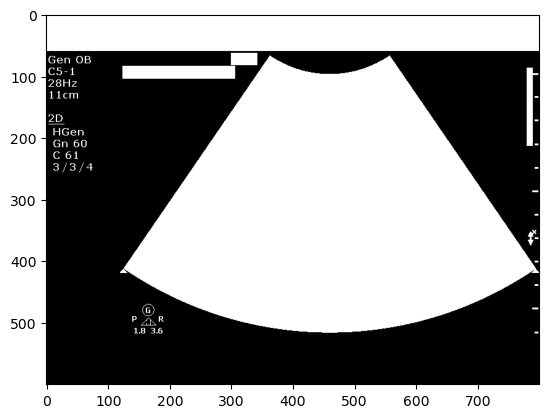

In [23]:
plt.imshow(rgb)

In [ ]:
from pydicom.pixel_data_handlers.util import apply_color_lut

fname = get_testdata_file("OBXXXX1A.dcm")
ds = dcmread(fname)
arr = ds.pixel_array
# You could also use the corresponding well-known SOP Instance UID
rgb = apply_color_lut(arr, palette='PET')

In [25]:
from pydicom.pixel_data_handlers.util import apply_modality_lut

fname = get_testdata_file("CT_small.dcm")
ds = dcmread(fname)
arr = ds.pixel_array
hu = apply_modality_lut(arr, ds)

In [27]:
from pydicom.pixel_data_handlers.util import apply_voi_lut

fname = get_testdata_file("MR-SIEMENS-DICOM-WithOverlays.dcm")
ds = dcmread(fname)
arr = ds.pixel_array
out = apply_voi_lut(arr, ds, index=0)

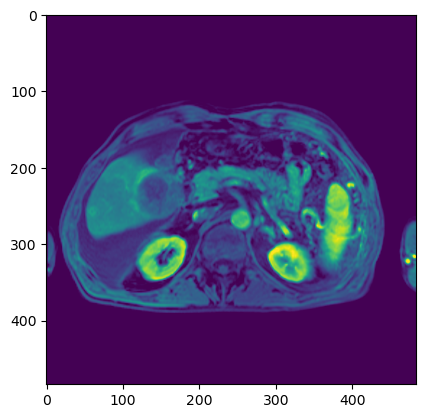

In [31]:
plt.imshow(out)

# Waveform Data

In [34]:
fpath = get_testdata_file("waveform_ecg.dcm")
ds = dcmread(fpath)
ds.WaveformSequence
multiplex = ds.WaveformSequence[0]
multiplex.NumberOfWaveformChannels

12

In [38]:
multiplex_1 = ds.waveform_array(0)

In [40]:
from pydicom.waveforms import multiplex_array
arr = multiplex_array(ds, 0, as_raw=True)
arr

array([[  80,   90,   10, ...,  -20,  -55,  -40],
       [  65,   85,   20, ...,  -20,  -60,  -40],
       [  50,   80,   30, ...,  -20,  -65,  -40],
       ...,
       [  20,  105,   85, ..., -110, -120,  -80],
       [  17,  110,   93, ..., -110, -120,  -85],
       [  20,  110,   90, ..., -110, -120,  -90]], dtype=int16)

# Read dicom file